In [1]:
import utils
import numpy as np
from deepchem import deepchem as dc
from sklearn.ensemble import RandomForestRegressor
from deepchem.models import SklearnModel
from joblib import dump, load

Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_sparse'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (c:\Users\xsj110\AppData\Local\Programs\Python\Python38\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading some Jax models, missing a dependency. No module named 'jaxlib'


In [2]:
utils.set_seed(50, False, False)

In [3]:
data = utils.load_data('10K.csv', 600, False)

In [4]:
featurizer = dc.feat.CircularFingerprint(size=1024)
train_data, valid_data, test_data, transformer = utils.receptor_data(data, 'r_i_docking_score', featurizer)

In [11]:
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=None)

model = SklearnModel(model=rf_regressor)

model.fit(train_data)

utils.save_rf_model(model, "rf")


In [12]:
# Evaluate the model using the validation dataset
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
valid_score = model.evaluate(valid_data, [metric], [transformer])
print(f"Validation Pearson R^2 score: {valid_score['pearson_r2_score']:.3f}")

# Evaluate the model using the test dataset
test_score = model.evaluate(test_data, [metric], [transformer])
print(f"Test Pearson R^2 score: {test_score['pearson_r2_score']:.3f}")


Validation Pearson R^2 score: 0.528
Test Pearson R^2 score: 0.527


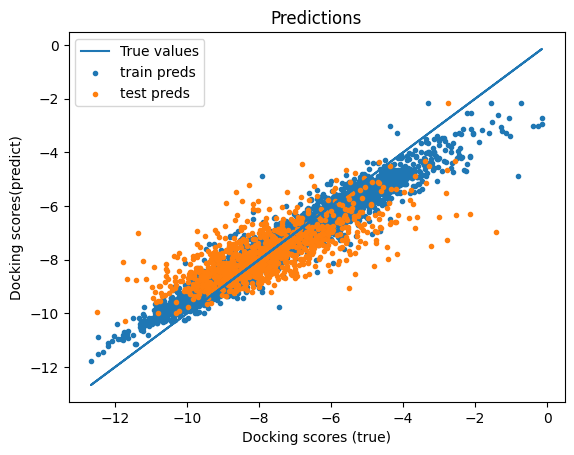

In [13]:
utils.plot_predictions(model, train_data, test_data, transformer)

In [14]:
utils.eval(model, test_data, [transformer])

RMSE   | 1.104
R2     | 0.518
MAE    | 0.829
mean   | -7.738
std    | 1.007


In [15]:
load_rf = load("models/rf01.joblib")
restored_model = SklearnModel(model=load_rf)

In [16]:
utils.eval(restored_model, test_data, [transformer])

RMSE   | 1.6
R2     | -0.012
MAE    | 1.217
mean   | -8.108
std    | 0.569
